## Método de Composición

La técnica de composición se aplica cuando la función de distribución $F$ de la que deseamos generar puede ser expresada como una combinación convexa de otras funciones de distribución $F_1, F_2,...$. Obviamente, será más fácil simular las variables aleatorias con distribuciones $F_1,...$ que la original con función de distribución $F$.

Específicamente, asumamos que para toda $x$, $F(x)$ puede ser escrita como
$$F(x) = \sum_{j = 1}^\infty p_j F_j(x)$$
donde $p_j\geq 0$, $\sum_{j = 1}^\infty p_j = 1$, y cada $F_j$ es una función de distribución. Aunque hemos escrito esta combinación como una suma infinita, puede haber un $k$ tal que $p_k$>0, pero $p_j=0$ for $j>k$, en cuyo caso la suma es finita. 

Equivalentemente, si $X$ tiene densidad $f$ puede ser escrito como
$$f(x) = \sum_{j = 1}^\infty p_j f_j(x)$$
donde las $f_j$´s son otras funciones de densidad, el ,étodo de composición en el caso discreto es análogo. El algoritmo del método de composición es el siguiente:

 1. Generar un número aleatorio entero positivo $J$ tal que
 $$P(J = j) = p_j \ \ para  \ \ j=1,2,...$$
 
 2. Devolver a $X$ con función de distribución $F_J$. 
 
 ### Comentarios:
  
   - El Paso 1, se puede pensar como elegir la función de distribución $F_j$ con probabilidad $p_j$ y podría lograrse, por ejemplo, mediante el método de la transformada inversa discreta. 
   
   - Dado que $J = j$, generar $X$ en el paso 2 debe hacerse, por supuesto independientemente de $J$. Al condicionar el valor de $J$ generado en el paso 1, podemos  ver fácilmente que la $X$ devuelta por el algoritmo tendrá la función de distribución $F$.
   
   $$P(X \leq x) = \sum_{j = 1}^\infty P(X \leq x| J=j)P(J = j) = \sum_{j = 1}^\infty F_j(x)p_j = F(x)$$
   
   ## Interpretación geométrica
   
   Para una variable aleatoria $X$ con densidad $f$, por ejemplo, podemos dividir el área de $f$ bajo regiones de áreas $p_1,.p_2,...$ correspondiente a la descomposición convexa. Entonces podemos pensar en el paso 1 como la elección de una región y el paso 2 como la generación de la distribución correspondiente a la región elegida. Los dos ejemplos siguientes permiten este tipo de interpretación geométrica. 

### Ejemplo 1: The double-exponential distribution (Laplace distribution)


$$f(x) = 0.5 e^x I_{(-\infty,0)}(x) + 0.5 e^{-x}I_{[0,\infty)}(x)$$

Por lo tanto, $f(x)$ es la combinación convexa de $f_1(x) = e^x I_{(-\infty,0)}(x) $ y $ f_2(x) = e^{-x} I_{(0, \infty)}(x)$, ambas son funciones de densidades, y $p_1 = p_2 = 0.5$. Por lo tanto, podemos generar un valor de $X$ con densidad $f$ por el método de composición

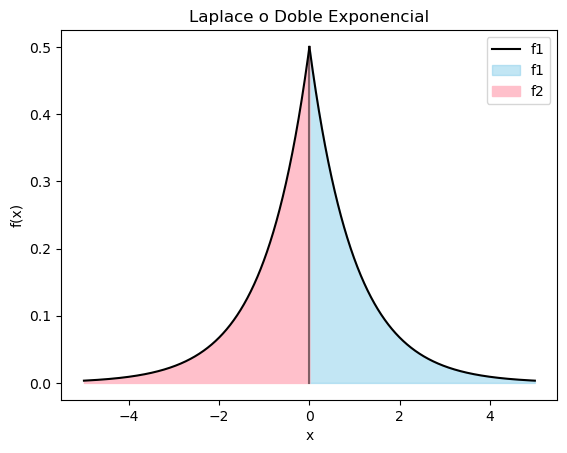

In [1]:
import numpy as np  # Importa la biblioteca NumPy para realizar operaciones numéricas.

# Genera 1000 puntos entre 0 y 5 para el eje x (parte positiva de la función).
x1 = np.linspace(0, 5, 1000)

# Genera 1000 puntos entre -5 y 0 para el eje x (parte negativa de la función).
x2 = np.linspace(-5, 0, 1000)

# Define la función de densidad f(x) para la distribución Laplace o Doble Exponencial.
# La función tiene diferentes formas para valores de x menores que 0 y mayores o iguales a 0.
def f(x):
    return np.where(x < 0, 0.5 * np.exp(x), 0.5 * np.exp(-x))
    # Si x < 0, f(x) = 0.5 * exp(x)
    # Si x >= 0, f(x) = 0.5 * exp(-x)

import matplotlib.pyplot as plt  # Importa la biblioteca Matplotlib para crear gráficos.

# Establece el título del gráfico.
plt.title("Laplace o Doble Exponencial")

# Grafica la función de densidad para la parte positiva de x (x >= 0).
plt.plot(x1, f(x1), color="black", label="f1")

# Rellena el área bajo la curva para la parte positiva de x, con color azul claro y algo de transparencia.
plt.fill_between(x1, f(x1), color="skyblue", alpha=0.5, label="f1")

# Grafica la función de densidad para la parte negativa de x (x < 0).
plt.plot(x2, f(x2), color="black")

# Rellena el área bajo la curva para la parte negativa de x, con color rosa.
plt.fill_between(x2, f(x2), color="pink", label="f2")

# Dibuja una línea vertical en x = 0 que representa la simetría de la distribución, con algo de transparencia.
plt.plot(np.zeros(1000), np.linspace(0, 0.5, 1000), color="black", alpha=0.5)

# Etiqueta para el eje y.
plt.ylabel("f(x)")

# Etiqueta para el eje x.
plt.xlabel("x")

# Muestra la leyenda que distingue las partes positivas y negativas de la función.
plt.legend()

# Muestra el gráfico.
plt.show()


## Algoritmo:
 Paso 1. Generamos dos pseudoaleatorios $U_1$ y $U_2$. 
 
 Paso 2. Si $U_1 \leq  0.5$ entonces $X = ln U_2$. En caso contrario $U_1 >0.5$ devuelve $X = - ln U_1$.

In [2]:
## Simulación de valores de una distribución Laplace

def rlaplace(size):
    # Genera dos arrays de números aleatorios uniformemente distribuidos entre 0 y 1.
    u1 = np.random.random(size)
    u2 = np.random.random(size)
    
    # Retorna valores simulados de la distribución Laplace.
    # Para u1 <= 0.5, el valor es log(u2), que corresponde a la parte negativa de la distribución.
    # Para u1 > 0.5, el valor es -log(u2), que corresponde a la parte positiva de la distribución.
    return np.where(u1 <= 0.5, np.log(u2), -np.log(u2))


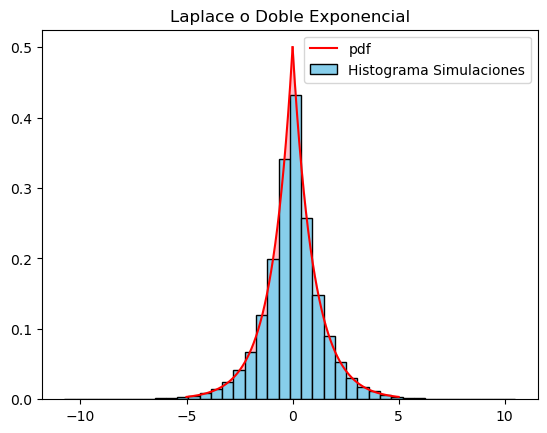

In [3]:
# Establece el título del gráfico
plt.title("Laplace o Doble Exponencial")

# Traza la función de densidad de probabilidad (pdf) de la distribución de Laplace usando una línea roja
plt.plot(x1, f(x1), color="red")

# Rellena el área bajo la curva de la función de densidad con color azul claro y transparencia
plt.fill_between(x1, f(x1), color="skyblue", alpha=0.5)

# Traza otra línea para la función de densidad de probabilidad, usando otra serie de puntos x2, también en rojo
plt.plot(x2, f(x2), color="red", label="pdf")

# Rellena el área bajo la curva de la función de densidad con color rosa
plt.fill_between(x2, f(x2), color="pink")

# Traza un histograma de los datos generados con la función rlaplace, normalizado para que la densidad sume a 1
# El histograma se dibuja en color azul claro con bordes negros
plt.hist(rlaplace(100000), density=True, color="skyblue", bins=40, edgecolor="black", label="Histograma Simulaciones")

# Muestra la leyenda del gráfico con las etiquetas definidas
plt.legend()

# Muestra el gráfico en pantalla
plt.show()


### Ejemplo 2: The right-trapezoidal distribution 

Considere $0<a<1$, la función de densidad es: 

$$f(x) = (a+2(1-x))x \ \cdot I_{[0,1]}$$

In [4]:
def f(x, a):
    # Calcula una función lineal con pendiente (1-a) y ordenada al origen a.
    return a + 2 * (1 - a) * x

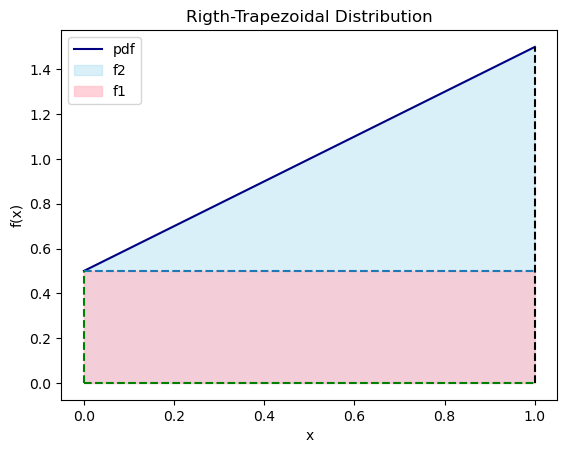

In [5]:
# Genera un array de 1000 valores igualmente espaciados en el intervalo [0, 1]
x = np.linspace(0, 1, 1000)

# Traza la función f(x, 0.5) en el intervalo [0, 1] usando una línea de color azul marino y etiqueta "pdf"
plt.plot(x, f(x, 0.5), color="navy", label="pdf")

# Rellena el área bajo la curva de la función f(x, 0.5) con color azul claro y transparencia del 30%, etiquetada como "f2"
plt.fill_between(x, f(x, 0.5), color="skyblue", alpha=0.3, label="f2")

# Traza una línea horizontal en y=0.5 con estilo de línea punteada
plt.plot(x, np.zeros(1000) + 0.5, linestyle="--")

# Rellena el área bajo la línea horizontal en y=0.5 con color rosa y transparencia del 70%, etiquetada como "f1"
plt.fill_between(x, np.zeros(1000) + 0.5, color="pink", label="f1", alpha=0.7)

# Traza una línea horizontal en y=0 con color verde y estilo de línea punteada
plt.plot(x, np.zeros(1000), color="green", linestyle="--")

# Traza una línea vertical en x=1 desde y=0 hasta y=2-0.5 con estilo de línea punteada y color negro
plt.plot(np.zeros(1000) + 1, np.linspace(0, 2 - 0.5, 1000), linestyle="--", color="black")

# Traza una línea vertical en x=0 desde y=0 hasta y=0.5 con color verde y estilo de línea punteada
plt.plot(np.zeros(1000), np.linspace(0, 0.5, 1000), color="green", linestyle="--")

# Establece el título del gráfico
plt.title("Rigth-Trapezoidal Distribution")

# Establece la etiqueta del eje x
plt.xlabel("x")

# Establece la etiqueta del eje y
plt.ylabel("f(x)")

# Muestra la leyenda del gráfico
plt.legend()

# Muestra el gráfico en pantalla
plt.show()


Como sugieren las líneas discontinuas, podemos pensar en dividir el área bajo $f$ en un rectángulo que tiene área $a$ y un tríangulo recto con área 1-a. Así, $f(x)$ puede ser descompuesto como

$$f(x) = a \ I_{[0,1]}(x) + (1-a)2 \ x\  I_{[0,1]}(x) $$
donde

 - $f_1(x) = I_{[0,1]}(x)$ la cual es la densidad de una distribución $U(0,1)$.
 - $f_2(x) = 2 \ \ x I_{[0,1]} (x)$ es una densidad triangular (derecha).
 - Claramente, $p_1 = a$ y $p_2 = 1-a$. 
 
Para simular una variable aleatoria $U(0,1)$ basta con generar un pseudoaleatorio $U$. Vamos a revisar como simular una variable aleatoria triangular con la función de densidad dada arriba. Calculemos su función de distribución para $0\leq x \leq 1$:
$$F(x) = \int_0^x f_2(t)dt = \int_0^x 2t dt = x^2$$
Aplicando el método de la transformada inversa
$$u = F(x) = x^2$$
luego
$$x = \sqrt{u}.$$
Nuestro Algoritmo será:
### Algoritmo:
 
 - Paso 1. Generar  $U1$, $U_2$ pseudoaleatorios. 
 - Paso 2. Si $X < a$ entonces $X = U_2$. En caso contrario $X = \sqrt{U_2}$.

In [6]:
def rtrapezoidal(size, a):
    # Genera un array de números aleatorios uniformemente distribuidos en el intervalo [0, 1).
    u1 = np.random.random(size)
    
    # Genera otro array de números aleatorios uniformemente distribuidos en el intervalo [0, 1).
    u2 = np.random.random(size)
    
    # Calcula y devuelve un array de números según la distribución trapezoidal.
    # La función np.where se usa para seleccionar entre dos posibles valores:
    # - u2 si u1 < a
    # - u2**0.5 si u1 >= a
    return np.where(u1 < a, u2, u2**0.5)


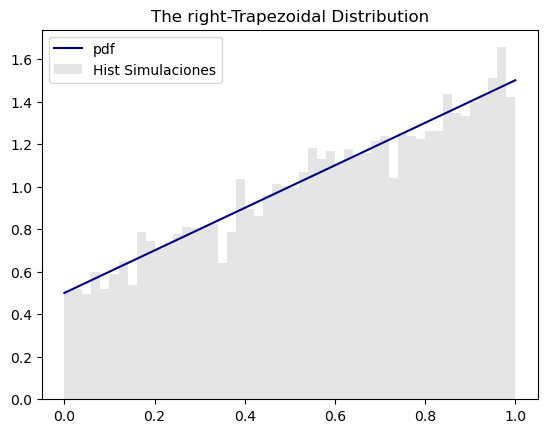

In [7]:
# Traza la función de densidad de probabilidad (pdf) usando una línea de color azul marino y etiqueta "pdf"
plt.plot(x, f(x, 0.5), color="navy", label="pdf")

# Traza un histograma de 10,000 muestras generadas con la función rtrapezoidal
# El histograma se dibuja en color negro con una transparencia del 10%, y se etiqueta como "Hist Simulaciones"
plt.hist(rtrapezoidal(10000, 0.5), bins=50, density=True, alpha=0.1, color="black", label="Hist Simulaciones")

# Establece el título del gráfico
plt.title("The right-Trapezoidal Distribution")

# Muestra la leyenda del gráfico con las etiquetas definidas
plt.legend()

# Muestra el gráfico en pantalla
plt.show()
